# **Milestone 2**
# Introduction 
With private interest in space travel becoming ever more prevalent it is important to look at what the history has been of previous flights.
The interest in this data set is one on the future of world technology. More space launches means an ever connected world with goals beyond our current planet. 
The main question that would be brought forth from our data is how privatization has played a larger role in keeping space alive.
    
# Steps taken
1.  Preview data
2.  Check total number of entries and column types
3.  Check any null values *none*
4.  Check duplicate entries *none*
5.  Plot distribution of numeric data (variate and pairwise joint distribution)
6.  Plot count distribution of categorical data
7.  Analise time series of numeric data


# Space Launches by Country and Year

# Original DataSet
The DataFrame below includes information about Space launches from 1957 to Modern-Day. The dataset includes:
- Columns separated by Day, Month, Year, and Time to show when and at what time the launches took place. There is also a DateTime column that combines these four previously mentioned columns into one column
- The company name refers to which organization was responsible for the launch
- There is a column called Status mission to indicate whether the mission was a success, failure, or partial failure
- includes a column indicating whether the launch was private or state run
- The Rocket column indicated the cost in millions for the launch
- Status rocket column shows whether or not the mission is still currently active or not
- Then there are two additional columns, the country of launch which tells us which country launched the rocket and the company’s country of origin column which shows which country the company who launched the rocket is from 

In [4]:
import pandas as pd
df = pd.read_csv ('/Users/anastasiachignon/dropbox/course-project-group_6017/data/raw/Global Space Launches.csv')
df

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA,P,2020-08-07 05:12:00+00:00,2020,8,7,07/08/2020,05:12
1,CASIC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,China,S,2020-08-06 04:01:00+00:00,2020,8,6,06/08/2020,04:01
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,P,2020-08-04 23:57:00+00:00,2020,8,4,04/08/2020,23:57
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,Russia,S,2020-07-30 21:25:00+00:00,2020,7,30,30/07/2020,21:25
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA,P,2020-07-30 11:50:00+00:00,2020,7,30,30/07/2020,11:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,USA,S,1958-02-05 07:33:00+00:00,1958,2,5,05/02/1958,07:33
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,USA,S,1958-02-01 03:48:00+00:00,1958,2,1,01/02/1958,03:48
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,USA,S,1957-12-06 16:44:00+00:00,1957,12,6,06/12/1957,16:44
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,Russia,S,1957-11-03 02:30:00+00:00,1957,11,3,03/11/1957,02:30


## Task 3: Method Chaining
- Through this method chaining I was able to get rid of all null values, create new columns specific to my data set, and clean the data. We also learned to use the load_and_process function to further simplify the data set. I have also used the df.describe function which allows for me to generate descriptive statistics, such as numerical values. 

Dataset after Method Chaining:
- Most of the column names remain the same as the original Dataset however the Rocket column was renamed to Cost in Millions
- The DateTime,” location, and detail” columns were dropped
- There was an additional of a new column named Launch_Origin to indicate whether the country of launch and the company’s country of origin where the same if so there is a yes in the row if not there is a no in the row
- All null values were also dropped in the rows and we reset the index


In [5]:
df = load_and_process('../../data/raw/Global Space Launches.csv')
df

NameError: name 'load_and_process' is not defined

# Method Chain wrapped in function 

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def load_and_process(url_or_path_to_csv_file):
    df1 = (pd.read_csv(url_or_path_to_csv_file).dropna()
          .reset_index(drop=True)  
          .rename(columns={" Rocket": "Cost in Millions of Rocket"})
    )

    # Method Chain 2 

    df2 = (
          df1
          .assign(Launch_origin=lambda x: np.where(x['Country of Launch']==x['Companys Country of Origin'], "True", "False"))
          .rename(columns={"Launch_origin": "Launch in Country of Company"})
          .drop([], axis=1)
    )

    # Return the latest dataframe

    return df2



# Exploratory Data Analysis (EDA)

In [7]:
df = load_and_process('../../data/raw/Global Space Launches.csv')
df.describe(include='all')

,Company Name,Location,Detail,Status Rocket,Cost in Millions of Rocket,Status Mission,Country of Launch,Companys Country of Origin,Private or State Run,DateTime,Year,Month,Day,Date,Time,Launch in Country of Company
count,964,964,964,964,964,964,964,964,964,964,964.000000,964.000000,964.000000,964,964,964
unique,25,56,962,2,56,4,8,7,2,963,NaN,NaN,NaN,922,659,2
top,CASIC,"LC-39A, Kennedy Space Center, Florida, USA",H-IIA 202 | IGS-Radar 5,StatusActive,450.0,Success,USA,USA,S,2008-11-05 00:15:00+00:00,NaN,NaN,NaN,09/10/2017,00:00,True
freq,158,120,2,586,136,910,490,508,499,2,NaN,NaN,NaN,3,7,797
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.484440,6.731328,15.685685,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.532855,3.379649,8.712303,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964.000000,1.000000,1.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001.750000,4.000000,8.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,7.000000,15.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,10.000000,23.000000,NaN,NaN,NaN


# Observations

1. There is an overwhelming majority of launches that are from their respective countries
2. Not many launches have failed however almost 2/3 are still active so it shows that over time they   
   become inactive 
3. The most expensive Rocket to launch was 450 Million 
5. There is only 25 Company's to ever launch a rocket, this seems rather small but includes only major, not personal small launches. 
6. Comparable to the cost of some holly wood movies, the most expensive rocket costs $450 USD at it's time of launch.
7. Pad 39-A, known for launches to interplanetary missions has taken around 10% of all major launches.
8. Failure is an option, Only 54 of the 964 launches have failed. Yet over time 586 of the 964 remain active

Text(0.5, 1.0, 'Launches seperated companys country of origin')

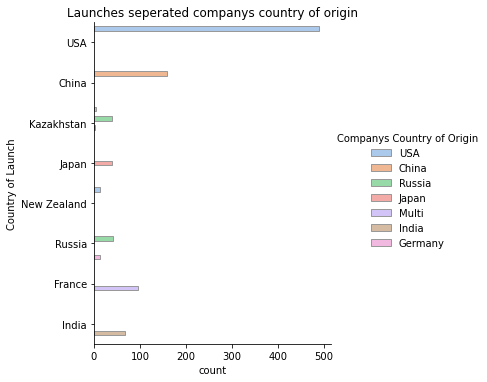

In [8]:
sns.catplot(y="Country of Launch", hue="Companys Country of Origin", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)
plt.title('Launches seperated companys country of origin')

# Observations
 - Using the country of launch and comapny's country of origin we can see that the United States had the largest amount of launches within their country
 - Russia had a few launches from Japanese companies 
 - Kazakhstan had a few US launches

Text(0.5, 1.0, 'Space launches by State and Private companies')

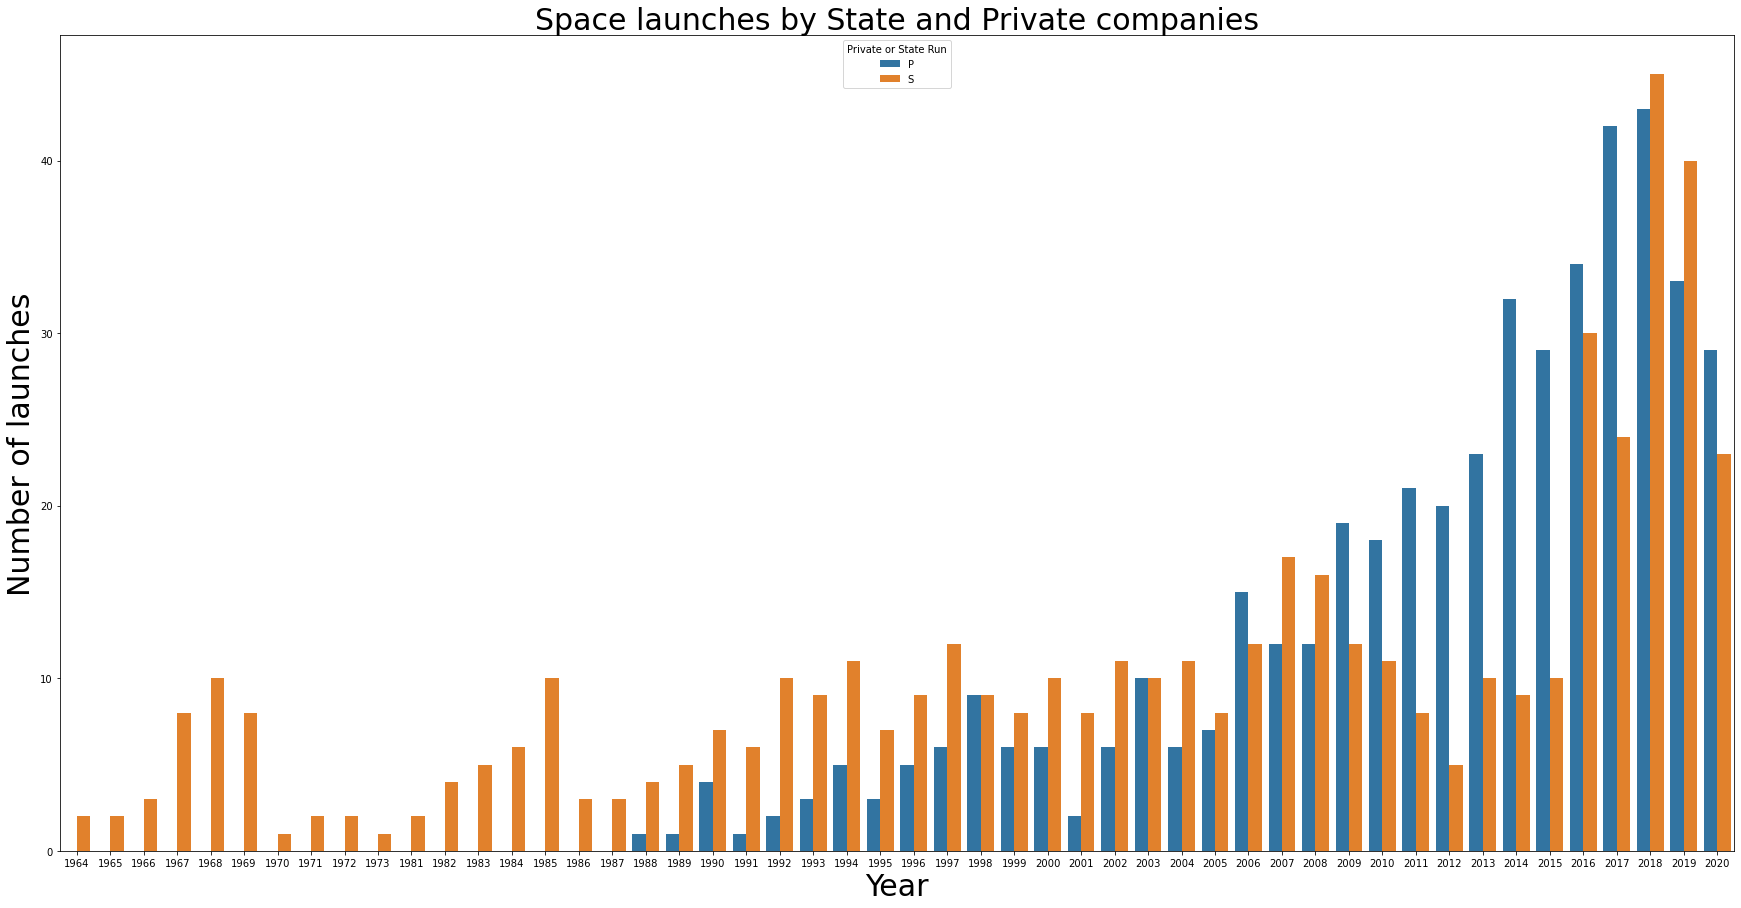

In [9]:
plt.figure(figsize=(30,15))
sns.countplot(data = df, x='Year', hue = 'Private or State Run')
plt.xlabel("Year", fontsize=30)
plt.ylabel("Number of launches", fontsize=30)
plt.title('Space launches by State and Private companies', fontsize=30)

# Observations:
- Privitization of Rocket launches began in 1998
- From 2006, there was a large spike in the privitization of rockets and for a few years after state 
   run launches decreased
- 2018 had the highest amount of both privitized and state run launches

# Space Launches by Year
As shown by the chart Privatization of space started 1988 but was not near the number of launches that State run organization had. There is a correlation from the rise of private launches and the fall of State run. This is to suggest that the rise of private launches are meeting some demand that until very recently State run organizations could not meet. This also ties back to our prior graph showing home more countrys now than ever are able to launch a rocket. This will make the access of space easier for more Countrys and Companys.

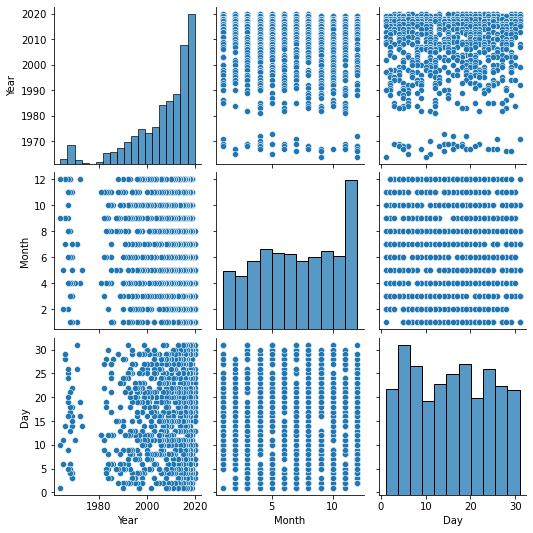

In [10]:
sns.pairplot(df)

# Observations

 - There is a sudden drop off of launches after the 1960-1970 boom. 
 - For what ever reason December has a lot more launches compared to the rest of the months.
 - Day over day we see that there is not really much change, So any rocket launched has the same chance day to day.
 - There seems to be an almost exponential increase, So we expect a launch to take place recently in December.

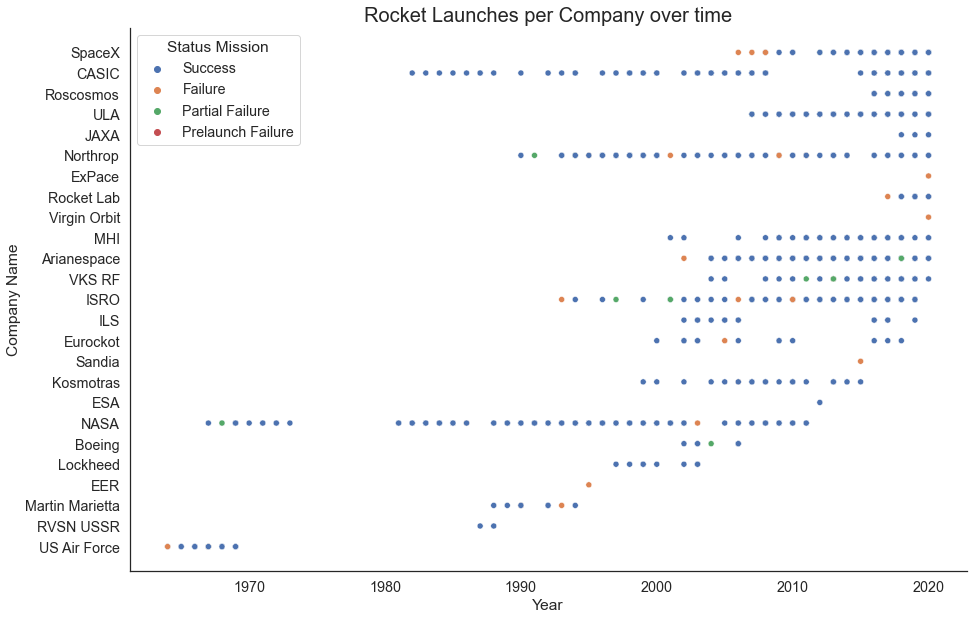

In [11]:
sns.set_theme(style="white",font_scale=1.3)
fig, ax=plt.subplots(figsize=(15,10))
ax = sns.scatterplot(x='Year', y='Company Name', hue='Status Mission', data=df)
sns.despine()
plt.title('Rocket Launches per Company over time', fontsize=20)
ax.set(xlabel='Year', ylabel='Company Name')
plt.show()

# Observations
1. Casic still has active rockets from 1985 
2. From 2000 onwards is when most rockets are still active, only Northrop and Casic have active 
   rockets in the years earler than 2000
3. The US airforce had the first failure
4. The first partial failure was in 1965 from NASA

# Analysis

## Research Question/s:
- Question 1: Which countries are pushing for privatization of Space Exploration?
- Question 2: Which countries have been most involved with space launches over the years?
- Question 3: How has the privatization of Space Exploration affected success rate and access to space?

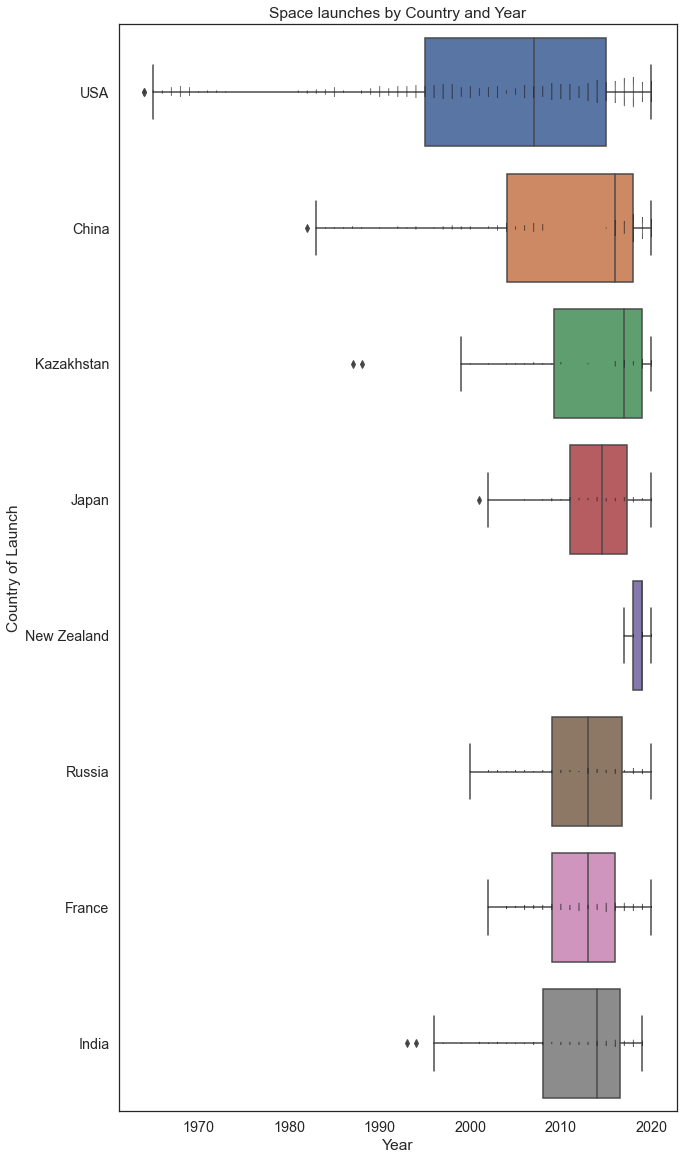

In [12]:
fig_dims = (10, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="Year", y="Country of Launch", data=df).set_title('Space launches by Country and Year')
sns.swarmplot(x="Year", y="Country of Launch", data=df, size=1, color=".1")
plt.show()

Text(0.5, 1.0, 'Counts of launches by State and Private Companies by Country')

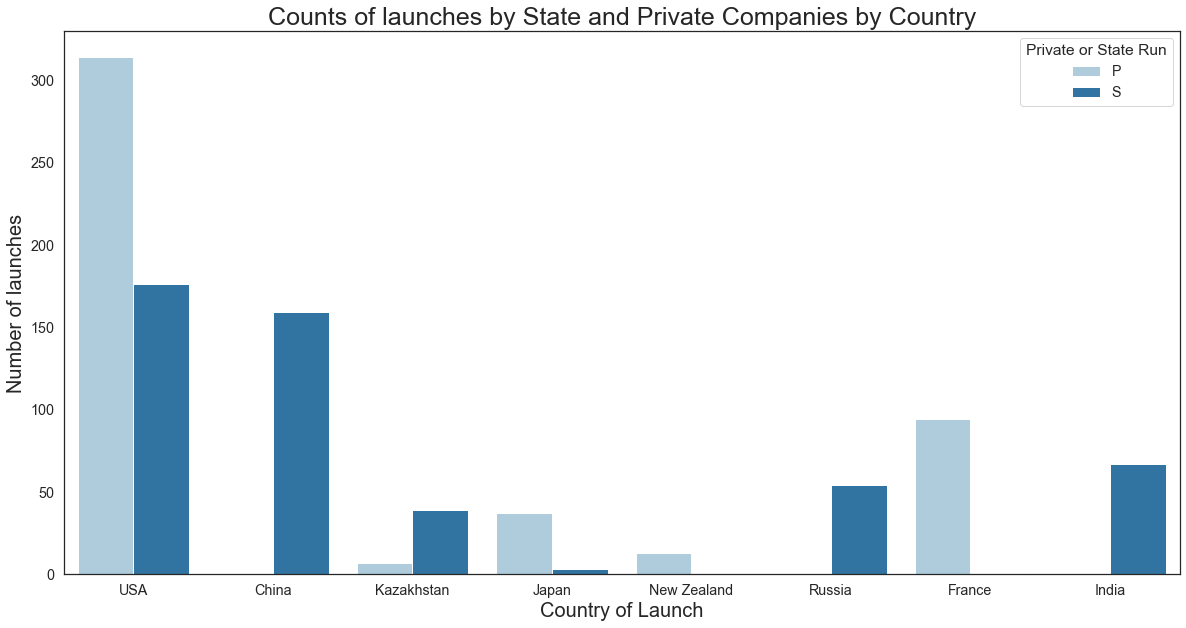

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x='Country of Launch', hue='Private or State Run', data=df, palette="Paired").set_title('Counts of launches by State and Private Companies by Country')
plt.xlabel("Country of Launch", fontsize=20)
plt.ylabel("Number of launches", fontsize=20)
plt.title('Counts of launches by State and Private Companies by Country', fontsize=25)

Text(0.5, 1.0, 'Counts of Successful and failed launchesby State and Private Companies')

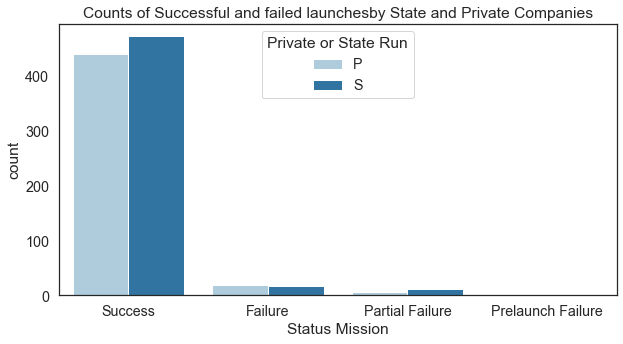

In [25]:
plt.figure(figsize=(10,5))
df_cat = df.select_dtypes(include = 'object').copy()
sns.countplot(x='Status Mission', hue='Private or State Run', data=df_cat, palette="Paired").set_title('Counts of Successful and failed launchesby State and Private Companies')

## Analysis/Results
- Question 1: Which countries have been most involved with space launches over the years?
     - BoxPlot: As shown by the boxplot the USA and Soviet Union were the countries that had the most Space launches from the 1960s to 2000s. As private space launches become more common, Russia lowered the amount of launches while the USA was still launching rockets steadily. China has started to increase the amount of space launches after 2010 to compete with the USA. The boxplot also shows how more countrys have access to space now than ever before, the majority of launches across countrys are closer to today. This data also supports the graph that shows that more recent Launches are Company and not state run.
- Question 2: Which countries are pushing for privatization of Space Exploration?
     - CountPlot 1: According to this countplot the country that the United States has been the most involves in space launches and is the country that is privitizing thier space launches the most.
- Question 3: How has the privatization of Space Exploration affected success rate and access to space?
     - CountPlot 2: This countplot allows us to see that space launches being backed by private entities do not seem to have a large difference in success rate compared to state launches.  

## Conclusion

Looking at the basic Launch data we can gather a lot about how Launches are conducted and who is the entity responsible for launching them. We know that a majority of the launches are from Country's, but by looking at our violin plot measuring year to Company we see that around 2010 is when Private entity's started their journey into space.  Our Violin plot also shows that most Company's launch more than 1 rocket and most that have launched more than 1 still launch in 2020. This correlates with our failure graph which shows that as time goes on there is more success , this is in part caused by Private Launches.Our plotted data also shows that most Country's launch rockets from their own land, this also follows that most Private run launches are done on their home land. We also see that recently State run Launches are trying to keep up with Private ones, This is to say that with each increase in Private launches there is an increase in State Launches.The last point of interest is that Private company's are much more likely to collaborate with other, while Country's, at least in the Launch phase, do not collaborate .